In [100]:
import pandas as pd

# load cleaned data
reviews = pd.read_csv('../Data/clean_data.csv')

reviews.head()

,aare,abandoned,ability,abit,able,abroad,absence,absolutely,abuse,ac,...,yep,yes,yesterday,yet,young,youngster,yummy,ziggo,zoo,Reviewer_Score
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [101]:
features = reviews.iloc[:,:reviews.shape[1]-1]
features.head()

,aare,abandoned,ability,abit,able,abroad,absence,absolutely,abuse,ac,...,year,yep,yes,yesterday,yet,young,youngster,yummy,ziggo,zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
labels = reviews.iloc[:, reviews.shape[1]-1]
labels.head()

0    1
1    1
2    1
3    1
4    1
Name: Reviewer_Score, dtype: int64

In [103]:
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = train_test_split(features.values, labels.values, test_size=0.33, random_state=47)

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import numpy as np

#fit model on new matrix
#obtain metrics for model
log_model = LogisticRegression()
log_model.fit(features_train, labels_train)
pred = log_model.predict(features_test)
print('number of 0s is ' + str(labels.shape[0] - np.sum(labels.values)))
print(metrics.accuracy_score(labels_test, pred))
print(metrics.roc_auc_score(labels_test, pred))

number of 0s is 61
0.9393939393939394
0.5478084278219665


In [105]:
log_model.coef_.shape

(1, 3110)

In [2]:
import pandas as pd

words = reviews.columns[: reviews.shape[1]-1]
coef = log_model.coef_.transpose()
#coef = [abs(x)[0] for x in coef]

word_importance = pd.DataFrame()
word_importance['word'] = words
word_importance['coef'] = coef

word_importance = word_importance.sort_values(by=['coef'], ascending = False)

word_importance.head()

NameError: name 'reviews' is not defined

In [107]:
words_wanted = 10
total_words = word_importance.shape[0]

most_positive = word_importance.iloc[:words_wanted].values
positive_word = [x[0] for x in most_positive]
postive_score = [x[1] for x in most_positive]


most_negative = word_importance.iloc[total_words-words_wanted:].sort_values(by='coef').values
print(type(most_negative))
negative_word = [x[0] for x in most_negative]
negative_score = [x[1] for x in most_negative]


<class 'numpy.ndarray'>


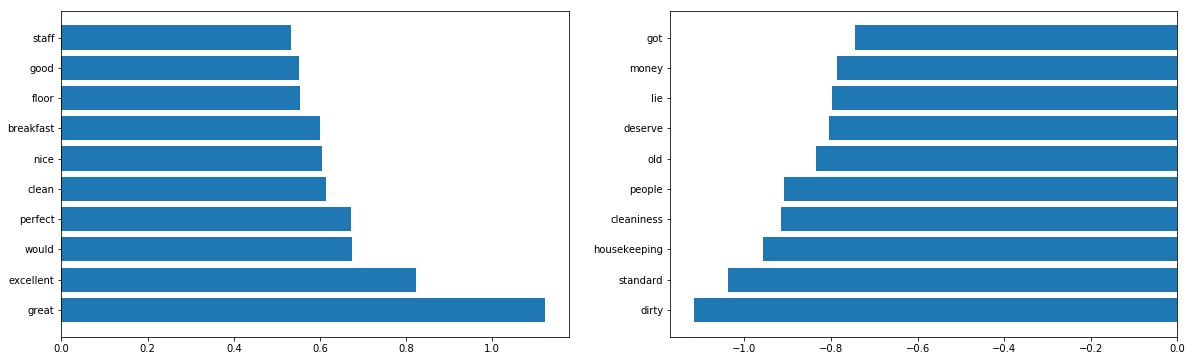

In [123]:
import matplotlib.pyplot as plt


fig = plt.subplots(figsize=(20, 6))
plt.subplot(121)
plt.barh(positive_word,postive_score)
plt.subplot(122)
plt.barh(negative_word,negative_score)

fig_path = '../export/'

plt.savefig(fig_path + 'linear_reg_most_important_words', fmt = 'png', dpi = 100)

In [117]:
def test_model(model, f_feature, f_label, t_feature, t_label):
    model.fit(f_feature, f_label)
    pred = model.predict(t_feature)
    acc_score(t_label, pred)
    auc_score(t_label, pred)
    
    
def acc_score(t_label, pred):
    print('Accuracy is ' + str(metrics.accuracy_score(t_label, pred)))

def auc_score(t_label, pred):
    print('AUC score is ' + str(metrics.roc_auc_score(t_label, pred)))


In [121]:
from sklearn.svm import SVC

SVM_clf_1 = SVC(C = 0.1, gamma = 1.0)
SVM_clf_2 = SVC(C = 1.0, gamma = 1.0, class_weight = None)
SVM_clf_3 = SVC(C = 1.0, gamma = 1.0, class_weight='balanced')



SVM_clf_3.fit(features_train, labels_train)


test_model(SVM_clf_1, features_train, labels_train, features_test, labels_test)
test_model(SVM_clf_2, features_train, labels_train, features_test, labels_test)
test_model(SVM_clf_3, features_train, labels_train, features_test, labels_test)
test_model(log_model, features_train, labels_train, features_test, labels_test)

Accuracy is 0.9424242424242424
AUC score is 0.5
Accuracy is 0.9424242424242424
AUC score is 0.5
Accuracy is 0.9424242424242424
AUC score is 0.5
Accuracy is 0.9393939393939394
AUC score is 0.5478084278219665
